In [4]:
import tensorflow as tf 
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test, = x_train /255, x_test / 255

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10 , batch_size=100, verbose=1)
print('fit time', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0896 - val_accuracy: 0.9780
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0828 - val_accuracy: 0.9807
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0739 - val_accuracy: 0.9821
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0889 - val_accuracy: 0.9780
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0648 - val_accuracy: 0.9850
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0722 - val_accuracy: 0.9831
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0783 - val_accuracy: 0.9815
Epoch 

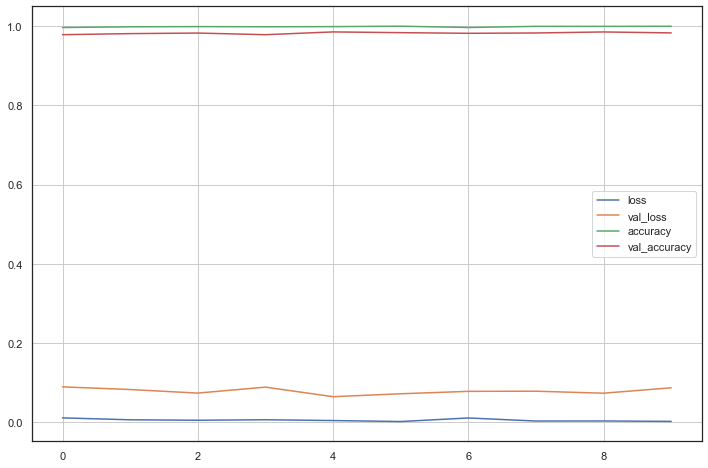

In [16]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [18]:
score = model.evaluate(x_test, y_test)
print (score[0])
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9825
0.08723209798336029
0.9825000166893005


In [21]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [24]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [28]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

175

In [29]:
import random
samples = random.choices(population = wrong_result, k=16)
samples

[3906,
 2654,
 2182,
 4248,
 149,
 4176,
 445,
 9770,
 3558,
 449,
 2771,
 9839,
 1242,
 707,
 3818,
 1178]

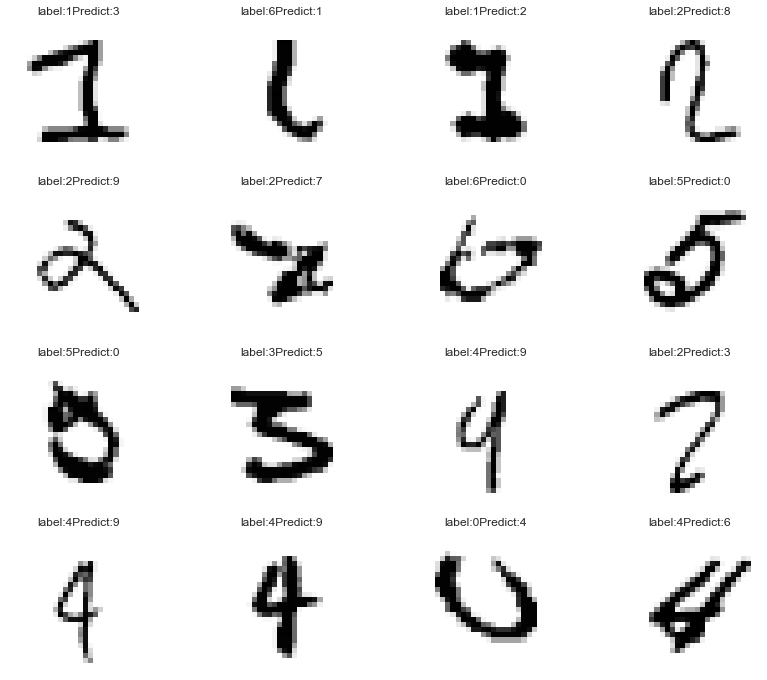

In [33]:
plt.figure(figsize=(14,12))
for idx,n in enumerate(samples):
    plt.subplot(4,4 , idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap="Greys", interpolation='nearest')
    plt.title('label:'  + str(y_test[n]) + 'Predict:'  +str(predicted_labels[n]))
    plt.axis('off')
plt.show()

In [50]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [51]:
import random
samples = random.choices(population = range(0,len(y_train)), k=16)

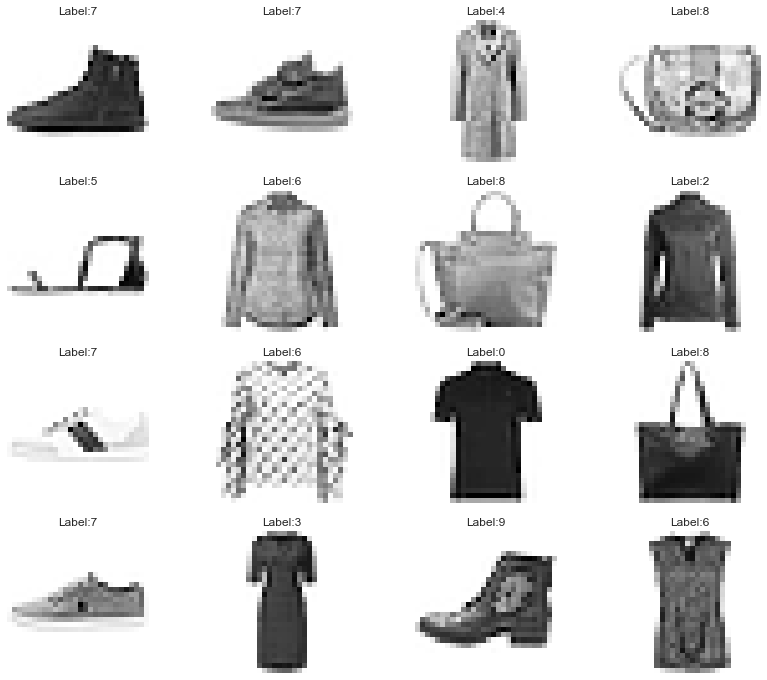

In [52]:
plt.figure(figsize=(14,12))
for idx ,  n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label:' + str(y_train[n]))
    plt.axis('off')  
plt.show()

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [55]:
import time
start_tiime = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1 )
print('fit time:', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.6108 - accuracy: 0.7830 - val_loss: 0.4213 - val_accuracy: 0.8532
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3725 - accuracy: 0.8659 - val_loss: 0.3771 - val_accuracy: 0.8629
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3220 - accuracy: 0.8824 - val_loss: 0.3747 - val_accuracy: 0.8712
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2980 - accuracy: 0.8891 - val_loss: 0.3514 - val_accuracy: 0.8742
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2757 - accuracy: 0.8972 - val_loss: 0.3409 - val_accuracy: 0.8763
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2584 - accuracy: 0.9054 - val_loss: 0.3368 - val_accuracy: 0.8760
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2521 - accuracy: 0.9071 - val_loss: 0.3779 - val_accuracy: 0.8670
Epoch 

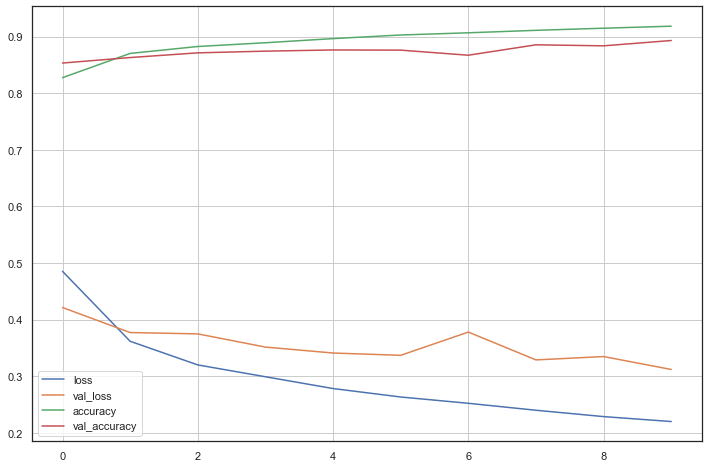

In [58]:
plot_target = ['loss', 'val_loss', 'accuracy' , 'val_accuracy']
plt.figure(figsize=(12,8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [56]:
score = model.evaluate(x_test, y_test)
print('test loss:', score[0])
print('test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3118 - accuracy: 0.8930
test loss: 0.3118389844894409
test accuracy: 0.8930000066757202


In [59]:
#error data 
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [63]:
wrong_result= []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

1070

In [64]:
#n=16 
samples = random.choices(population = wrong_result, k =16)

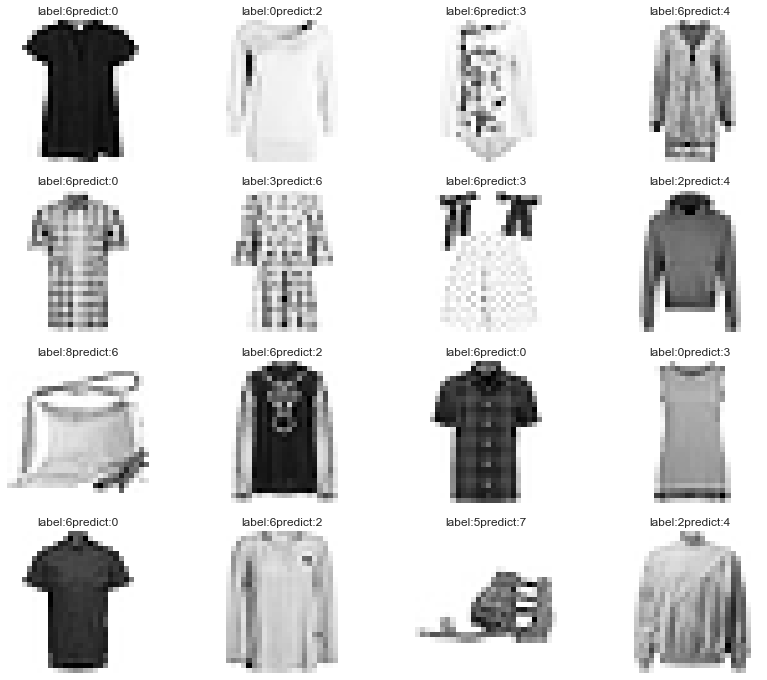

In [66]:
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('label:' + str(y_test[n]) + 'predict:' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()